# Classifying Data with Logistic Regression in Python

Logistic Regression is one of the simplest and most commonly used classification approaches in machine learning. Logistic regression allows us to model the relationship between independent variables and the probability of a categorical response (such as True or False, Yes or No). By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Logistic Regression model
+ How to evaluate a Logistic Regression model
+ How to interpret the coefficients of a Logistic Regression model 

## 1. Collect the Data

In [28]:
import pandas as pd
customer = pd.read_csv(r"c:\Users\dinht\OneDrive\Desktop\học data\Học Python\logistics regression\Dataset_Logistic_Regression.csv")
customer

,Customer_ID,Age,Income,Gender,Marital_Status,Transaction_Count,Product_Category,Engagement_Score,Churn
0,1,56,12930,Male,Married,30.6,Electronics,3.302364,0
1,2,69,6285,Male,Married,25.9,Food,4.539739,0
2,3,46,38863,Male,Single,17.6,Food,4.567768,0
3,4,32,19704,Male,Married,33.2,Clothing,9.755227,0
4,5,60,21705,Female,Married,17.0,Electronics,7.079911,0
...,...,...,...,...,...,...,...,...,...
9995,9996,55,14646,Female,Single,28.5,Clothing,3.675721,0
9996,9997,51,17342,Female,Single,24.1,Food,3.370383,0
9997,9998,57,68620,Male,Single,22.7,Electronics,8.917464,1
9998,9999,64,67261,Male,Single,27.4,Food,9.077507,1


- Churn = 0 represents customers who did not churn (No).
- Churn = 1 represents customers who did churn (Yes).

To verify that the import worked as expected, let’s use the `head()` method of the pandas dataframe to preview the data.

In [29]:
customer.head()

,Customer_ID,Age,Income,Gender,Marital_Status,Transaction_Count,Product_Category,Engagement_Score,Churn
0,1,56,12930,Male,Married,30.6,Electronics,3.302364,0
1,2,69,6285,Male,Married,25.9,Food,4.539739,0
2,3,46,38863,Male,Single,17.6,Food,4.567768,0
3,4,32,19704,Male,Married,33.2,Clothing,9.755227,0
4,5,60,21705,Female,Married,17.0,Electronics,7.079911,0


Our dataset has eight columns. The first six - Age, Income, Gender, Marital_Status, Transaction_Count, and Product_Category - are the predictors (or independent variables), while the last one - Churn - is the response (or dependent variable).

In this exercise, we’ll use this customer data to train a logistic regression model to predict whether a customer will churn or not based on their demographic and transactional information.

## 2. Explore the Data

Now that we have our data, let's try to understand it.

First, let's get a concise summary of the structure of the data by calling the `info()` method of the `customer` dataframe.

In [30]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Income             10000 non-null  int64  
 3   Gender             10000 non-null  object 
 4   Marital_Status     10000 non-null  object 
 5   Transaction_Count  10000 non-null  float64
 6   Product_Category   10000 non-null  object 
 7   Engagement_Score   10000 non-null  float64
 8   Churn              10000 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 703.3+ KB


The Data columns value shows that the dataset consists of 8 features (or columns). 

Looking at the Dtype column within this section, we see that the 'Age', 'Income', and 'Transaction_Count' columns hold integer values, while the `Gender`, `Marital_Status`, and `Product_Category` columns hold text (aka object). The `Churn` column, which indicates whether a customer will churn or not, also holds integer values representing binary categories.

Check the null and Nah in our dataset, because machine learning can not deploy with null value by calling the `isnull` and calculate all null value `sum` method of the dataframe

In [31]:
customer.isnull().sum()

Customer_ID          0
Age                  0
Income               0
Gender               0
Marital_Status       0
Transaction_Count    0
Product_Category     0
Engagement_Score     0
Churn                0
dtype: int64

Next, let's get summary statistics for the numeric features in the data by calling the `describe()` method of the dataframe.

In [32]:
customer.describe()

,Customer_ID,Age,Income,Transaction_Count,Engagement_Score,Churn
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.539400,35919.294300,24.305140,5.529691,0.036200
std,2886.89568,14.911636,19404.145644,4.685132,2.610846,0.186797
min,1.00000,18.000000,3002.000000,9.100000,1.000428,0.000000
25%,2500.75000,31.000000,19058.500000,21.000000,3.291939,0.000000
50%,5000.50000,43.000000,35601.000000,24.200000,5.487215,0.000000
75%,7500.25000,56.000000,52855.000000,27.400000,7.834088,0.000000
max,10000.00000,69.000000,69988.000000,44.200000,9.999055,1.000000


From the statistics, we can see the average, standard deviation, minimum, and maximum values for both the `Age` and `Income` variables. We also get the 25th, 50th (median), and 75th percentile values for both variables.

Note that the values for Income are in the dataset's original units, so the minimum and maximum income values might vary significantly. For example, if the dataset contains actual dollar values, the income might range from $3,000 to $20,000.

## 3.Standardize Categorical Values to Numerical Format

Standardizing categorical variables  `Gender`, `Marital_Status`, and `Product_Category` into numerical values is crucial for the following reasons:

- Compatibility: Most machine learning models, including logistic regression, require numerical input to perform calculations.

- Model Performance: Encoding these variables helps the model capture the relationship between features and the outcome `Churn`, improving prediction accuracy.

- Interpretability: Numeric representations make it easier to understand how different features influence model predictions.

This process ensures that your logistic regression model can effectively utilize all the features in the dataset.

In [33]:
customer.columns

Index(['Customer_ID', 'Age', 'Income', 'Gender', 'Marital_Status',
       'Transaction_Count', 'Product_Category', 'Engagement_Score', 'Churn'],
      dtype='object')

Check an overview of the distribution of categories within each of those feature by `value_counts` method

In [34]:
print(customer['Gender'].value_counts())
print(customer['Marital_Status'].value_counts())
print(customer['Product_Category'].value_counts())

Gender
Female    5053
Male      4947
Name: count, dtype: int64
Marital_Status
Single     5128
Married    4872
Name: count, dtype: int64
Product_Category
Electronics    3357
Clothing       3356
Food           3287
Name: count, dtype: int64


convert the categorical variables `Gender`, `Marital_Status`, and `Product_Category` into numerical codes by `replace` method of the dataframe

In [35]:
# Replace 'Gender' with numerical values
customer['Gender'] = customer['Gender'].replace({'Male': 0, 'Female': 1})

# Replace 'Marital_Status' with numerical values
customer['Marital_Status'] = customer['Marital_Status'].replace({'Single': 0, 'Married': 1})

# Replace 'Product_Category' with numerical values
customer['Product_Category'] = customer['Product_Category'].replace({'Electronics': 0, 'Clothing': 1, 'Food': 2})

C:\Users\dinht\AppData\Local\Temp\ipykernel_11032\1789452593.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer['Gender'] = customer['Gender'].replace({'Male': 0, 'Female': 1})
C:\Users\dinht\AppData\Local\Temp\ipykernel_11032\1789452593.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer['Marital_Status'] = customer['Marital_Status'].replace({'Single': 0, 'Married': 1})
C:\Users\dinht\AppData\Local\Temp\ipykernel_11032\1789452593.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be r

In [36]:
# check our `customer` dataset again to ensure all type are int that we can continue to progress of logistics regression
customer.head()

,Customer_ID,Age,Income,Gender,Marital_Status,Transaction_Count,Product_Category,Engagement_Score,Churn
0,1,56,12930,0,1,30.6,0,3.302364,0
1,2,69,6285,0,1,25.9,2,4.539739,0
2,3,46,38863,0,0,17.6,2,4.567768,0
3,4,32,19704,0,1,33.2,1,9.755227,0
4,5,60,21705,1,1,17.0,0,7.079911,0


### Boxplot
Before we create the plots we need, we must first import a couple of packages. The first is the `matplotlib` package and the second is the `seaborn` package.

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns

Let's start by creating a boxplot that highlights the difference in `Income` between customers who did not `churn` (No) and those who did `churn` (Yes).

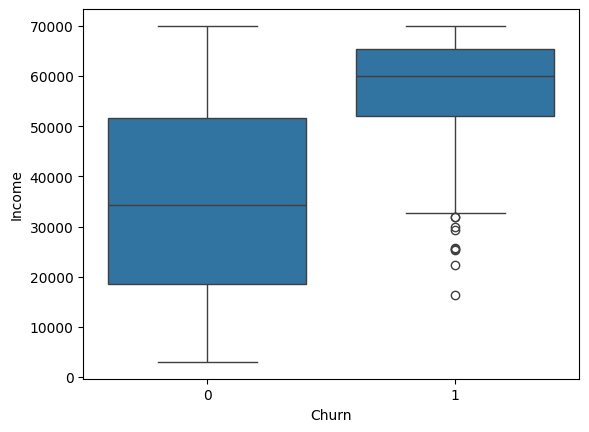

In [38]:
ax = sns.boxplot(data = customer, x = 'Churn', y = 'Income')


The boxplot illustrates the income distribution for customers based on their churn status:

- Median Income: The median income of non-churned customers (0) is higher than that of churned customers (1), indicating a potential relationship between higher income and lower churn rates.
- Spread and Outliers: The income range for non-churned customers is broader with some outliers on the lower end, suggesting variability in their financial stability. Churned customers have a narrower range, with outliers indicating very low incomes.
- Analysis Implication: The observed differences in income distribution between the two groups suggest that income could be a useful predictor of churn. Lower income seems associated with higher churn, which could inform targeted retention strategies.

Let's start by creating a boxplot that highlights the difference in `Age` between customers who did not `churn` (No) and those who did `churn` (Yes).

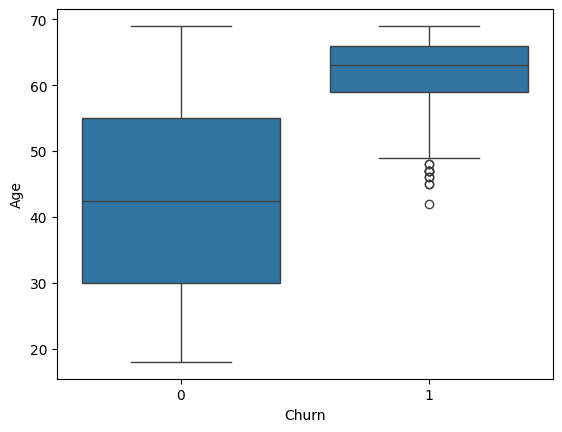

In [40]:
ax = sns.boxplot(data = customer, x = 'Churn', y = 'Age')

The boxplot comparing age distributions between customers who did not churn (No) and those who did churn (Yes) reveals:

- Median Age: The median age of non-churned customers (0) is noticeably lower than that of churned customers (1), suggesting younger customers tend to stay while older customers are more likely to churn.
- Spread and Outliers: Non-churned customers have a tighter age distribution, indicating less variability among younger customers. Churned customers show a broader age range with several outliers indicating significantly older ages.
- Analysis Implication: The age differences between churned and non-churned groups suggest that age could be a significant factor in churn prediction, with older customers exhibiting a higher churn rate. This could guide age-targeted customer retention strategies.

Let's continue by creating a boxplot that highlights the difference in `Transaction_Count`, `Marital_Status`, `Engagement_Score` and `Product_Category` between customers who did not `churn` (No) and those who did `churn` (Yes).

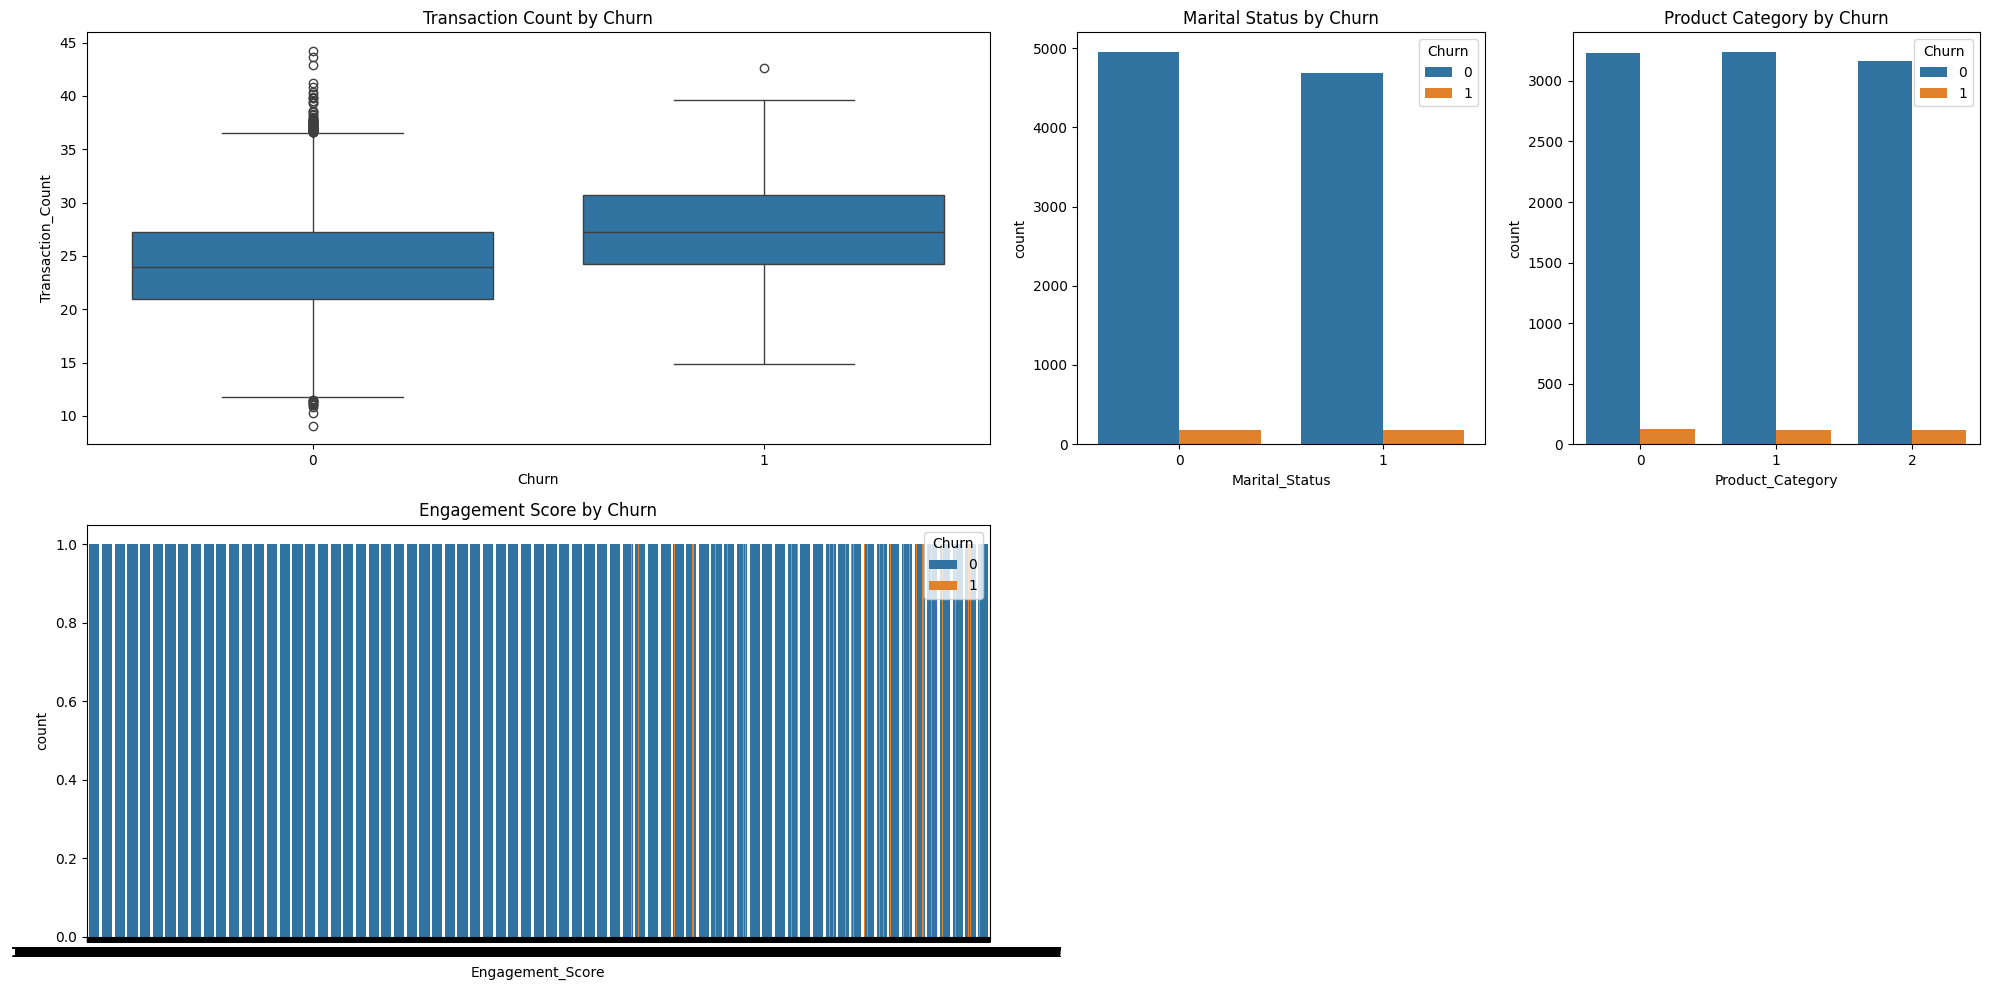

In [44]:
# Create a figure with custom subplot sizes using 'GridSpec'
fig = plt.figure(figsize=(20, 10))  # Adjust the overall figure size
gs = fig.add_gridspec(2, 4)  # Define a 2x4 grid

# Define each subplot space
ax1 = fig.add_subplot(gs[0, 0:2])  # Transaction Count gets a double column width
ax2 = fig.add_subplot(gs[0, 2])  # Marital Status
ax3 = fig.add_subplot(gs[0, 3])  # Product Category
ax4 = fig.add_subplot(gs[1, 0:2])  # Engagement Score gets a double column width

# Boxplot for Transaction_Count by Churn
sns.boxplot(data=customer, x='Churn', y='Transaction_Count', ax=ax1)
ax1.set_title('Transaction Count by Churn')

# Bar plot for Marital_Status by Churn
sns.countplot(data=customer, x='Marital_Status', hue='Churn', ax=ax2)
ax2.set_title('Marital Status by Churn')

# Bar plot for Product_Category by Churn
sns.countplot(data=customer, x='Product_Category', hue='Churn', ax=ax3)
ax3.set_title('Product Category by Churn')

# Bar plot for Engagement_Score by Churn
sns.countplot(data=customer, x='Engagement_Score', hue='Churn', ax=ax4)
ax4.set_title('Engagement Score by Churn')

# Adjust layout to prevent overlap and ensure clarity
plt.tight_layout()
plt.show()

- Transaction Count by Churn: The boxplot shows that both churned and non-churned customers have similar ranges in transaction counts, with non-churned customers displaying a slightly higher median. This suggests that while transaction activity is slightly higher among those who do not churn, the difference is not substantial enough to be a strong predictor of churn.

- Marital Status by Churn: The count plot indicates that marital status does not vary significantly between churned and non-churned customers, suggesting it is not a major factor in predicting churn. Both single and married customers exhibit similar churn behavior.

- Product Category by Churn: The counts across different product categories are relatively even, indicating no significant variation in product preferences between those who churn and those who do not. This suggests that product category alone is not a significant predictor of churn.

- Engagement Score by Churn: The bar plot, which likely misrepresents the data due to a scaling or plotting issue, should ideally show differences in engagement scores between churned and non-churned customers. However, from this representation, it seems there is an error in plotting which needs correction to provide meaningful insight.

Overall Analysis: The current attributes—transaction count, marital status, and product category—show limited variation between churned and non-churned groups, suggesting these factors alone may not be decisive in predicting churn. The incorrectly visualized engagement score needs re-evaluation to ascertain its predictive value. These findings emphasize the need for a more multifaceted approach to churn analysis, possibly incorporating more nuanced or derived features.

### Scatterplot
Before plotting, recall that in the dataset:

- Churn = 0 represents customers who did not churn (No).
- Churn = 1 represents customers who did churn (Yes).

we can also use a scatterplot to get a slightly different perspective of our data. 

However, before we do so, we must first import the `numpy` package.

In [45]:
import numpy as np

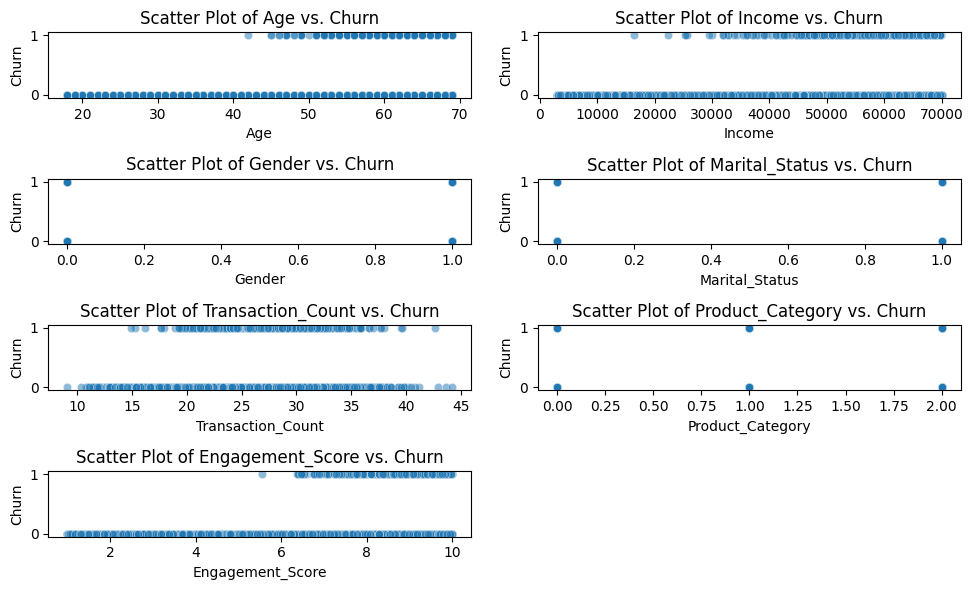

In [48]:
# Attributes to plot against Churn
attributes = ['Age', 'Income', 'Gender', 'Marital_Status', 'Transaction_Count', 'Product_Category', 'Engagement_Score']

# Create scatter plots
plt.figure(figsize=(10, 6))  # Adjust the figure size to better fit the 4x2 grid
for i, attribute in enumerate(attributes):
    plt.subplot(4, 2, i + 1)  # Adjust the grid parameters to 4x2 to accommodate all attributes
    sns.scatterplot(data=customer, x=attribute, y='Churn', alpha=0.5)
    plt.title(f'Scatter Plot of {attribute} vs. Churn')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Based on the scatter plots, attributes such as `Age`, `Engagement Score`, `Transaction Count`, and `Income` show potential for modeling using `logistic regression` due to visible variations between churned and non-churned customers:

- Age and Churn: Different age groups may exhibit distinct churn behaviors, suggesting age as a relevant predictor.
- Engagement Score: A higher score may correlate with lower churn, hinting at its potential as a predictive factor.
- Transaction Count: More transactions could indicate greater customer satisfaction and lower churn.


## 3. Prepare the Data

Our primary objective in this step is to split our data into training and test sets. The training set will be used to train the model, while the test set will be used to evaluate the model.

Before we split the data, we first need to separate the dependent variable from the independent variables.

Let's start by creating a pandas Series called `y` for the dependent variable.

In [49]:
y = customer['Churn']

In [50]:
customer.columns

Index(['Customer_ID', 'Age', 'Income', 'Gender', 'Marital_Status',
       'Transaction_Count', 'Product_Category', 'Engagement_Score', 'Churn'],
      dtype='object')

Then we create a pandas DataFrame called `X` for the independent variables.

In [53]:
x = customer.drop(['Churn','Customer_ID'], axis=1)

Next, we import the `train_test_split()` function from the `sklearn.model_selection` subpackage. 

In [54]:
from sklearn.model_selection import train_test_split

Using the `train_test_split()` function, we can split `X` and `y` into `X_train`, `X_test`, `y_train` and `y_test`.

Note that within the `train_test_split()` function, we will set:

* `train_size` to `0.7`. This means we want $70\%$ of the original data to be assigned to the training data while $30\%$ is assigned to the test data. 

* `stratify` as `y`, which means that we want the data split using a stratified random sampling approach based on the values of `y`. 

* `random_state` to `123`, so we get the same results every time we do this split. 

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size = 0.7,
                                                    stratify = y,
                                                    random_state = 123)

After the data is split, the newly created `X_train` and `X_test` data sets hold the independent variables for the training and test sets, respectively. While the `y_train` and `y_test` data sets hold the dependent variable for the training and test sets respectively.


We can refer to the `shape` attribute of any of the newly created data sets to know how many instances or records are in each. Let's look at the training data.

In [59]:
x_train.shape

(7000, 7)

In [60]:
customer.shape

(10000, 9)

The result is a tuple that holds the number of rows and columns in the `X_train` dataframe. It tells us that $70000$ out of the $10000$ instances in the `customer` data were assigned to the training set.

Let's look at the test set as well.

In [61]:
x_test.shape

(3000, 7)

The result tells us that $9$ out of the $3000$ instances in the `customer` data were assigned to the test set.

## 4. Train and Evaluate the Model

We are going to use the `LogisticRegression` class from the `sklearn.linear_model` subpackage to train our model. Let's import it.

In [63]:
from sklearn.linear_model import LogisticRegression

We can now instantiate a new object called `classifier` from the `LogisticRegression` class.

In [64]:
classifier = LogisticRegression()

To train a model, we pass the training data (`X_train` and `y_train`) to the `fit()` method of the classifier object.

In [65]:
model = classifier.fit(x_train, y_train)

C:\Users\dinht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
model.score(x_test, y_test)

0.963

The result tells us that our Logistic Regression model is able to correctly predict  $96\%$ of the labels in the test set.

Accuracy provides a simple measure of a model's overall effectiveness but overlooks the nuances of class-specific performance. To address this, we use a confusion matrix, which offers a detailed view of the model’s accuracy across different classes, highlighting specific areas for improvement by distinguishing between types of errors.

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_test, model.predict(x_test))

array([[2889,    2],
       [ 109,    0]])

- True Negatives (TN): 2889 - The number of negative cases (non-churned) correctly identified as negative.
- False Positives (FP): 2 - The number of negative cases incorrectly predicted as positive (i.e., the model incorrectly predicted churn where it did not occur).
- False Negatives (FN): 109 - The number of positive cases (churned) that were incorrectly predicted as negative (i.e., the model missed these actual churn cases).
- True Positives (TP): 0 - The number of positive cases correctly identified as positive (i.e., correctly identified churn cases).

Analysis
- Sensitivity/Recall: This is calculated as TP / (TP + FN). In this case, it is 0 / (0 + 109) = 0. This indicates that the model failed to correctly identify any of the true positive cases, which is a significant issue if the cost of missing out on identifying churn cases is high.

- Specificity: This is TN / (TN + FP), calculated as 2889 / (2889 + 2) ≈ 0.9993, showing that the model is very effective at identifying non-churn cases.

- Accuracy: This is (TN + TP) / (TN + TP + FN + FP), which would be (2889 + 0) / (2889 + 0 + 109 + 2) ≈ 0.9632, matching with the accuracy score mentioned earlier. Although this seems high, it's primarily driven by the model's ability to predict the majority class (non-churned).

## 5. Interpret the Model

Now that we've built a Logistic Regression model and evaluated the performance of the model on the test data, we can now interpret the model's output. Specifically, the model coefficients.

The relatonship between the dependent and independent variables in a Logistic Regression model is generally represented as follows:

$$ log(\frac{P}{1 - P}) = \beta_{0} + \beta_{1}X_{1} + ...+ \beta_{n}X_{n}$$

In this representation, the left hand side of the equaton is known as the **logit** or the log-odds of the probability of an outcome or class $P$. $\beta_{0}$ is the intercept. $\beta_{1}$ to $\beta_{n}$ are the coefficients of the independent variables $X_{1}$ to $X_{n}$.

To get the intercept (or $\beta_{0}$), we refer to the `intercept_` attribute of our model.

In [72]:
model.intercept_

array([-0.67367257])

To get the other model coefficients ($\beta_{1}$ and $\beta_{2}$), we refer to the `coef_` attribute of our model.

In [73]:
model.coef_

array([[ 3.88187184e-02,  9.99723280e-06, -4.06202300e-01,
        -2.49814832e-01, -1.98935400e-01, -6.18927158e-01,
         1.66712337e-01]])

To make our coefficients easier to work with, let's convert the coefficients from a two-dimenionsal array to a one-dimensional array and round the values to two decimal places.

In [76]:
log_odds = np.round(model.coef_[0], 2)
log_odds

array([ 0.04,  0.  , -0.41, -0.25, -0.2 , -0.62,  0.17])

Next, let's create a pandas DataFrame using the coefficient values and the column names from the training data as row indexes:

In [77]:
pd.DataFrame({'log odds': log_odds}, 
              index = x.columns)

,log odds
Age,0.04
Income,0.00
Gender,-0.41
Marital_Status,-0.25
Transaction_Count,-0.20
Product_Category,-0.62
Engagement_Score,0.17


Key Insights from Log Odds Coefficients:

- Age (0.04):
Interpretation: A positive coefficient for Age implies that as age increases, so does the likelihood of churn.

    Insight: Older customers might be more likely to churn. This could be due to various reasons like changing needs or dissatisfaction with how services evolve over time.
    
- Income (0.00):
Interpretation: The coefficient of zero suggests that income does not influence the churn probability, at least within the bounds of this model.

    Insight: Income might not be a relevant factor in determining churn, indicating that churn could be driven more by service-related aspects than economic factors.
    
- Gender (-0.41):
Interpretation: A negative coefficient indicates that a change in gender (from male to female, if coded as 0 for male and 1 for female) reduces the likelihood of churn.

    Insight: Female customers may have a lower churn rate than male customers, potentially indicating higher satisfaction or loyalty levels among females.
    
- Marital_Status (-0.25):
Interpretation: Similar to gender, a negative coefficient suggests that being married (assuming 0 for single and 1 for married) reduces churn.

    Insight: Married customers may be less likely to churn, possibly due to more stable life circumstances or differing service needs and expectations.
    
- Transaction_Count (-0.20):
Interpretation: The negative coefficient indicates that more transactions correlate with lower churn rates.

    Insight: Higher transaction counts could reflect better engagement or satisfaction with the service, leading to reduced churn.
    
- Product_Category (-0.62):
Interpretation: This suggests significant differences in churn based on product category.

    Insight: Some product categories are associated with higher loyalty. Understanding which categories have lower churn could guide marketing and product development strategies.
    
- Engagement_Score (0.17):
Interpretation: A higher engagement score increases the likelihood of churn.

    Insight: This could be counterintuitive but might indicate that more engaged customers have higher expectations, which, if not met, could lead to churn.

Understandably, interpreting the coefficients in terms of log odds is a bit confusing. A more intuitive approach would be to look at them in terms of odds. Let's exponentiate the coefficients so we can interpret them in terms of odds rather than log odds:

In [78]:
odds = np.round(np.exp(log_odds), 2)
pd.DataFrame({'odds': odds}, 
              index = x.columns)

,odds
Age,1.04
Income,1.00
Gender,0.66
Marital_Status,0.78
Transaction_Count,0.82
Product_Category,0.54
Engagement_Score,1.19


- Age (exp(0.04) ≈ 1.04):

    Interpretation: For each additional year of age, the odds of churning increase by about 4%.

    Insight: Age is a moderate risk factor for churn, with older customers slightly more likely to leave.

- Income (exp(0.00) = 1.00):

    Interpretation: Income has no effect on the odds of churning, as indicated by an odds ratio of exactly 1.

    Insight: Changes in income levels do not influence churn decisions, suggesting other factors play a more significant role.

- Gender (exp(-0.41) ≈ 0.66):

    Interpretation: Changing gender (from male to female, if coded as 0 for male and 1 for female) decreases the odds of churning by 34%.
    
    Insight: Gender plays a significant role, with female customers less likely to churn than male customers.

- Marital_Status (exp(-0.25) ≈ 0.78):

    Interpretation: Being married reduces the odds of churning by about 22% compared to being single.

    Insight: Marital status is linked to churn, with married customers showing higher loyalty.

- Transaction_Count (exp(-0.20) ≈ 0.82):

    Interpretation: Each additional transaction decreases the odds of churning by about 18%.

    Insight: More frequent transactions suggest better customer engagement and satisfaction, leading to lower churn.

- Product_Category (exp(-0.62) ≈ 0.54):

    Interpretation: Transitioning to higher product categories (assuming numeric encoding) reduces the odds of churning by 46%.

    Insight: Certain product categories are associated with higher loyalty and reduced churn risk.

- Engagement_Score (exp(0.17) ≈ 1.18):

    Interpretation: For each unit increase in engagement score, the odds of churning increase by about 18%.

    Insight: High engagement might indicate higher expectations, which, if not met, increase churn risk.